# Linear Regression

## Simple Linear Regression

### OLS

Let's take a look at how to apply linear regression to a simple dataset.
The following data contains information about red wine, and other related variables. 

One of the variables is the quality of the wine (a numerical value between 1 and 5). The remaining variables are chemical properties of that wine.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import metrics, datasets, preprocessing

import scipy.stats as stats

In [7]:
wine = pd.read_csv("../data/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.shape

(1599, 12)

In [9]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

To begin with, our goal is to to study the relationship between **alcohol quantity** and quality of the wine. First, we visualise the data using tools fom the Matlibplot toolbox.

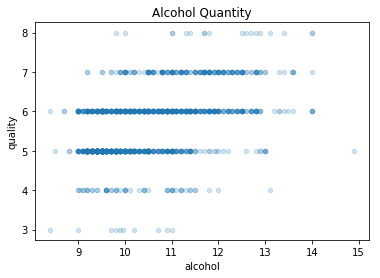

In [10]:
wine.plot.scatter('alcohol', 'quality', title='Alcohol Quantity',
                 alpha=0.2)

With data like the above, where there are many points that fall on the same y-value, it is difficult to identify the pattern in the points. 

We can aid the visualisation with a little jitter to the y-axis.

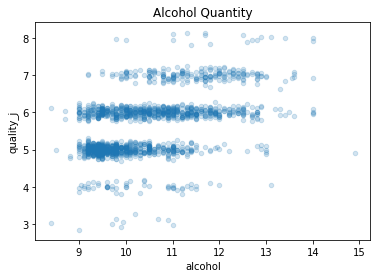

In [11]:
# create jitters.
wine['quality_j'] = wine.quality + 0.1*np.random.randn(1599)
wine.plot.scatter('alcohol', 'quality_j', title='Alcohol Quantity', 
                 alpha=0.2)

### Fitting a Simple Linear Regression Model

In [12]:
slr_est= LinearRegression()
X = wine.alcohol.values.reshape(-1, 1)
y = wine.quality.values
slr_est.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('The coefficient and intercept are', 
      '{:.3f} and {:.3f} respectively.'.format(slr_est.coef_[0], 
                                               slr_est.intercept_))

The coefficient and intercept are 0.361 and 1.875 respectively.


Now let us obtain the fitted values, and plot them along with the raw data.

In [14]:
y_hat = slr_est.predict(X)
r2 = metrics.r2_score(y, y_hat)
mse = metrics.mean_squared_error(y, y_hat)
print('The MSE and R2 are',
     '{:.3f} and {:.3f} respectively.'.format(mse, r2))

The MSE and R2 are 0.504 and 0.227 respectively.


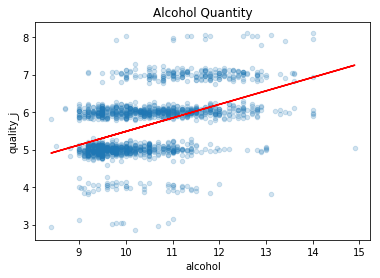

In [15]:
wine['quality_j'] = wine.quality + 0.1*np.random.randn(1599)
wine.plot.scatter('alcohol', 'quality_j', title='Alcohol Quantity', 
                 alpha=0.2)
plt.plot(wine.alcohol, y_hat,  color='red')

### Residual Checks

((array([-3.33053651, -3.075151  , -2.93323893, ...,  2.93323893,
          3.075151  ,  3.33053651]),
  array([-2.84423431, -2.80815013, -2.73598178, ...,  2.15576569,
          2.51660746,  2.58877581])),
 (0.7024244499882188, 2.2092312763860797e-16, 0.9876244789882977))

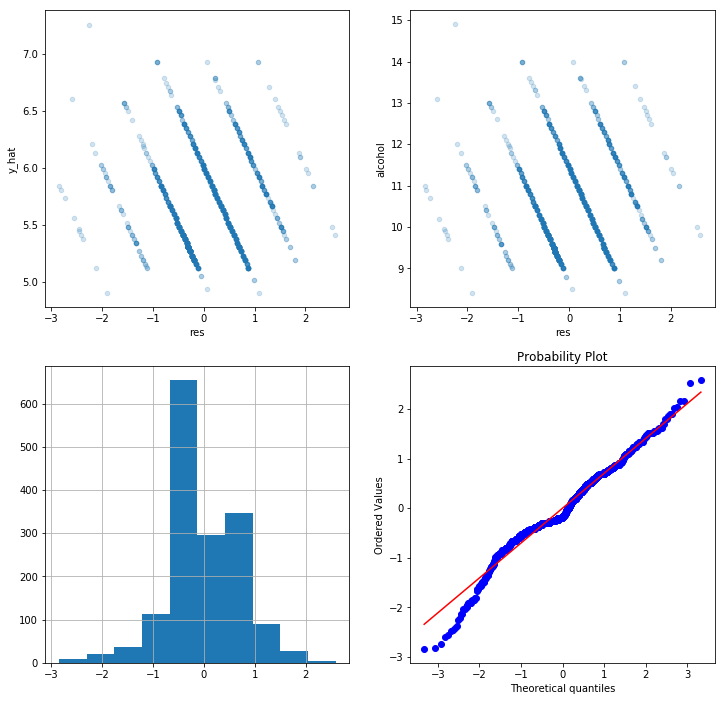

In [16]:
wine['y_hat'] = y_hat
wine['res'] = wine.quality - wine.y_hat

plt.figure(figsize=(12,12))

ax1 = plt.subplot(221)
wine.plot.scatter('res', 'y_hat', ax=ax1, alpha=0.2)

ax1 = plt.subplot(222)
wine.plot.scatter('res', 'alcohol', ax=ax1, alpha=0.2)

ax1 = plt.subplot(223)
wine.res.hist(ax=ax1)

ax1 = plt.subplot(224)
stats.probplot(wine.res, dist="norm", plot=plt)

Why is there that strange pattern in the residuals? Is this a decent fit to the data? What alternatives do we have?

## Polynomial Regression

Let's use another example. The Boston housing data set provides measurements of 13 attributes of housing markets around Boston, as well as the median price. We shall aim to model the price of a market given a set of attributes.

The dataset is one of several datasets that can be obtained through sklearn itself. These can be used for practice, or for understanding functions/models in sklearn. Here's how we can download the Boston dataset.

In [17]:
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


These are the features available in the dataset.

In [18]:
print ('Keys:', boston.keys())
print ('Feature names:',boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Let's consider predicting median house values in the Boston Area using LSTAT as the attribute.

In [19]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
X = df_boston.LSTAT.values.reshape(-1,1)
y = boston.target

In [20]:
bos_lr = LinearRegression()
bos_lr.fit(X,y)
y_hat = bos_lr.predict(X)
print('R2 is {:.2f}'.format(metrics.r2_score(y, y_hat)))

R2 is 0.54


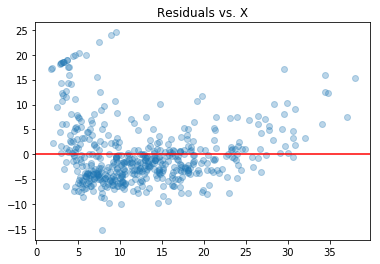

In [21]:
res = y - y_hat
plt.scatter(X, res, alpha=0.3)
plt.title("Residuals vs. X")
plt.axhline(0, color='red')

The residual plot shows a quadratic trend in it. This suggests that we should include a quadratic effect in the model. Here is how we can do it, using the pre-processing module of sklearn.

In [36]:
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [38]:
poly = preprocessing.PolynomialFeatures(2)
X_quadratic = poly.fit_transform(X)
X_quadratic

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [40]:
poly = preprocessing.PolynomialFeatures(2)
# Can change 2 into any q.
poly.fit(X)
X_quadratic = poly.transform(X)
X_quadratic

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [41]:
bos_qr = LinearRegression()
bos_qr.fit(X_quadratic, y)
y_hat_q = bos_qr.predict(X_quadratic)
print('R2 is {:.2f}'.format(metrics.r2_score(y, y_hat_q)))

R2 is 0.64


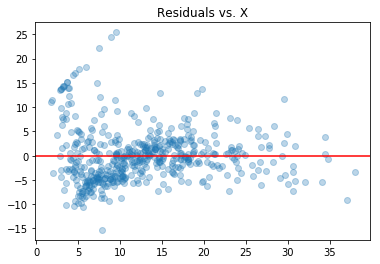

In [42]:
res_q = y - y_hat_q
plt.scatter(X_quadratic[:, 1], res_q, alpha=0.3)
plt.title("Residuals vs. X")
plt.axhline(0, color='red')

These residuals look much better behaved than earlier!

### Multiple Explanatory Variables 

Out of 13, only 3 variables will be considered here. The scatterplot depicts the relationship with the response.rrelation of several variables.

In [24]:
print (boston.feature_names)
indexes = [5, 6, 12] # 3 of the 13 variables: LSTAT, AGE, RM.
print (boston.feature_names[indexes])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


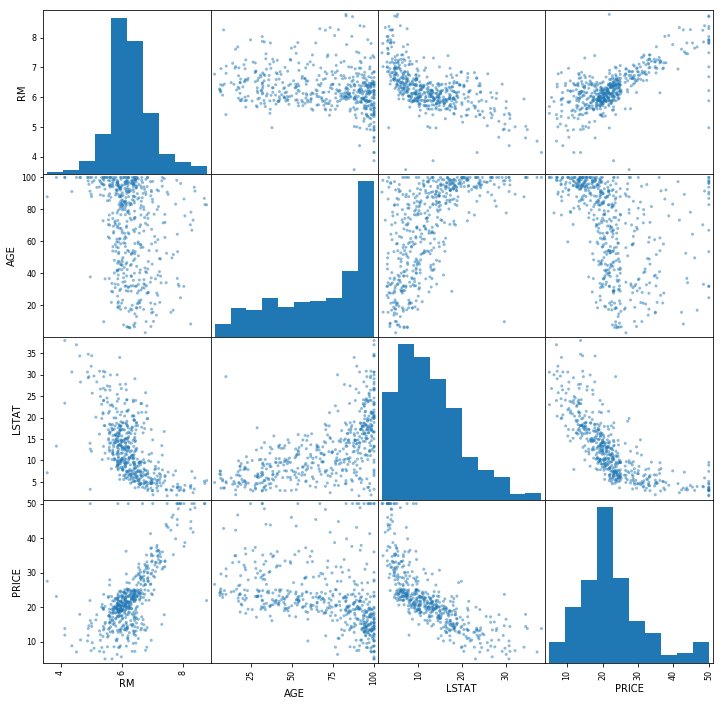

In [25]:
#set up a data frame df2 with 4 columns.
indexes = [5, 6, 12]
df2 = pd.DataFrame(boston.data[:,indexes],columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target
ax1 = scatter_matrix(df2, figsize = (12.0, 12.0)) 

It can be seen that RM has a linear relation with price, whereas AGE does not. Hence we drop AGE. However, as we observed earlier, LSTAT follows a higher-order relation with price. Thus we shall include higher order terms for both LSTAT and RM. 

In [43]:
X_new = df2.loc[:, ['RM', 'LSTAT']].values
X_new

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       ...,
       [6.976, 5.64 ],
       [6.794, 6.48 ],
       [6.03 , 7.88 ]])

In [26]:
poly2 = preprocessing.PolynomialFeatures(2)
X_new_quad = poly2.fit_transform(X_new)

In [27]:
X_new_quad[0:3, :]
# x1, x2, x1^2, x1x2, x2^2

array([[ 1.      ,  6.575   ,  4.98    , 43.230625, 32.7435  , 24.8004  ],
       [ 1.      ,  6.421   ,  9.14    , 41.229241, 58.68794 , 83.5396  ],
       [ 1.      ,  7.185   ,  4.03    , 51.624225, 28.95555 , 16.2409  ]])

There are six features in the matrix, which correspond to $1, a, b, a^2, a*b, b^2$.

In [28]:
y = df2.PRICE
mlr = LinearRegression()
mlr.fit(X_new_quad, y)
y_hat_3 = mlr.predict(X_new_quad)

In [29]:
print('R2 is {:.2f}'.format(metrics.r2_score(y, y_hat_3)))

R2 is 0.76


# Sparse model 

In [30]:
las1 = Lasso(alpha=0.3)
las1.fit(X_new_quad, y)
las1.coef_

array([ 0.        , -0.        ,  0.10237579,  0.53528574, -0.23397672,
        0.01840654])

# Logistic regression 

Let's take a look at another example. Here we have a datset of NBA scores with many different variables. Let us see if how well we can explain victory/defeat using just the three-point shooting percentage of a team.

In [ ]:
# log(prob./(1-prob.))=b0+b1x1
# prob./(1-prob.): odds of success.
# Interpretation: 
#prob.= e^(b0+b1x1)/[1+e^(b0+b1x1)]
# calculate odds ratio:
# [prob2./(1-prob2.)]/[prob1./(1-prob1.)] = e^b1

In [31]:
nba_data=pd.read_csv("../data/nba.games.stats.csv")
nba_data.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [32]:
X_nba = nba_data['X3PointShots.'].values.reshape(-1,1)

In [33]:
y_enc = preprocessing.LabelEncoder()
y_nba = y_enc.fit_transform(nba_data.WINorLOSS)

In [34]:
#fitting a linear regression
logreg = LogisticRegression()
logreg.fit(X_nba, y_nba)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
logreg.coef_

array([[6.82845666]])

This can be interpreted in the following manner, for instance:

If a team can increase its 3-point shooting percentage from 10 to 20%, the associated odds ratio of victory is $e^{6.82 * 0.1}$.